In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
# loading the data set
df = pd.read_csv(r'C:\Users\eltanany shop\Desktop\IEEE\BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [25]:
#showing the first five rows
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [26]:
df['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [30]:
#showing the data type of every column 
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [31]:
#showing the sum of the null values
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [32]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
selling_price - 0.0%
year - 0.0%
seller_type - 0.0%
owner - 0.0%
km_driven - 0.0%
ex_showroom_price - 0.40999057492931196%


In [33]:
# showing the sum of duplicated values
df.duplicated().sum()

6

In [34]:
# we can use the interpolate way to fill the null value 
df.interpolate(method = 'linear' , inplace = True , limit_direction='both')
# or we can use mean to fill non value
# but the interpolate is better way to get accurate value
# df['ex_showroom_price'].mean() 
# df['ex_showroom_price'].fillna (mean، inplace = True)

In [35]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
selling_price - 0.0%
year - 0.0%
seller_type - 0.0%
owner - 0.0%
km_driven - 0.0%
ex_showroom_price - 0.0%


In [14]:
# we can drop duplicated values
df=df.drop_duplicates().sum()
df.duplicated().sum()

0

# How do you find outliers in your dataset?
#### -Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers(Histogram,Box plot,Scatter plot)   
#### -Use a statistical method to calculate the outlier data points.
#### -Apply a statistical method to drop or transform the outliers by inter quantile rang (IQR) .

In [8]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


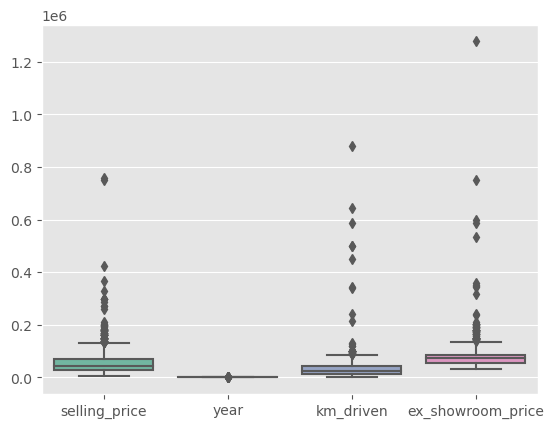

In [28]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")

In [36]:
# function to calculate outliers
def find_outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3 - q1

#  the outlier data points are the ones falling below Q1–1.5*IQR or above Q3 + 1.5*IQR
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [37]:
# Number of outliers in each column
outliers_year = find_outliers_IQR(df["year"])
outliers_km_driven = find_outliers_IQR(df["km_driven"])
outliers_selling_price = find_outliers_IQR(df["selling_price"])
outliers_ex_showroom_price = find_outliers_IQR(df["ex_showroom_price"])

print("number of outliers year: "+ str(len(outliers_year)))
print("number of outliers km driven: "+ str(len(outliers_km_driven)))
print("number of outliers selling price: "+ str(len(outliers_selling_price)))
print("number of outliers outliers ex_showroom price: "+ str(len(outliers_ex_showroom_price)))

number of outliers year: 18
number of outliers km driven: 39
number of outliers selling price: 87
number of outliers outliers ex_showroom price: 123


# let's impute the outlier as null value in evey columns and fill this null value with suitable values

In [38]:
# let be the outliers be null values in year column
for x in ["year"]:
    q3, q1 = np.percentile(df.loc[:, x], [75, 25])
    IQR = q3 - q1
 
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
 
    df.loc[df[x] < lower, x] = np.nan
    df.loc[df[x] > upper, x] = np.nan
    
df.isnull().sum()

name                  0
selling_price         0
year                 18
seller_type           0
owner                 0
km_driven             0
ex_showroom_price     0
dtype: int64

In [39]:
df.shape

(1061, 7)

In [40]:
# Drop the outliers
df = df.dropna(axis = 0)
df.shape

(1043, 7)

In [41]:
# let the outliers be null value in km_driven column
for x in ["km_driven"]:
    q3, q1 = np.percentile(df.loc[:, x], [75, 25])
    IQR = q3 - q1
 
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
 
    df.loc[df[x] < lower, x] = np.nan
    df.loc[df[x] > upper, x] = np.nan
    
df.isnull().sum()

C:\Users\eltanany shop\AppData\Local\Temp\ipykernel_12868\7988935.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[x] < lower, x] = np.nan


name                  0
selling_price         0
year                  0
seller_type           0
owner                 0
km_driven            42
ex_showroom_price     0
dtype: int64

In [42]:
# Impute the null values with median.

for i in ["km_driven"]:
    df.loc[df.loc[:, i].isnull(), i] = df.loc[:, i].median()
    
df.isnull().sum()   

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [43]:
# let the outliers be null value in ex_showroom price column
for x in ["ex_showroom_price"]:
    q3, q1 = np.percentile(df.loc[:, x], [75, 25])
    IQR = q3 - q1
 
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
 
    df.loc[df[x] < lower, x] = np.nan
    df.loc[df[x] > upper, x] = np.nan
    

df.isnull().sum() 

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    121
dtype: int64

In [45]:
# Impute the null values with use mean way .
for i in ["ex_showroom_price"]:
    df.loc[df.loc[:, i].isnull(), i] = df.loc[:, i].mean()
df.isnull().sum()     

#the other way to fill null value is interpolate way but the mean way is better way
# df["ex_showroom_price"].interpolate(method = 'linear' , inplace = True , limit_direction='both')
# df.isnull().sum() 

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [46]:
# let the outliers be null value in selling price column
for x in ["selling_price"]:
    q3, q1 = np.percentile(df.loc[:, x], [75, 25])
    IQR = q3 - q1
 
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
 
    df.loc[df[x] < lower, x] = np.nan
    df.loc[df[x] > upper, x] = np.nan
df.isnull().sum()      

C:\Users\eltanany shop\AppData\Local\Temp\ipykernel_12868\3578846345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[x] < lower, x] = np.nan


name                  0
selling_price        86
year                  0
seller_type           0
owner                 0
km_driven             0
ex_showroom_price     0
dtype: int64

In [47]:
# Impute the null values with mean.
for i in ["selling_price"]:
    df.loc[df.loc[:, i].isnull(), i] = df.loc[:, i].mean()
df.isnull().sum()   

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

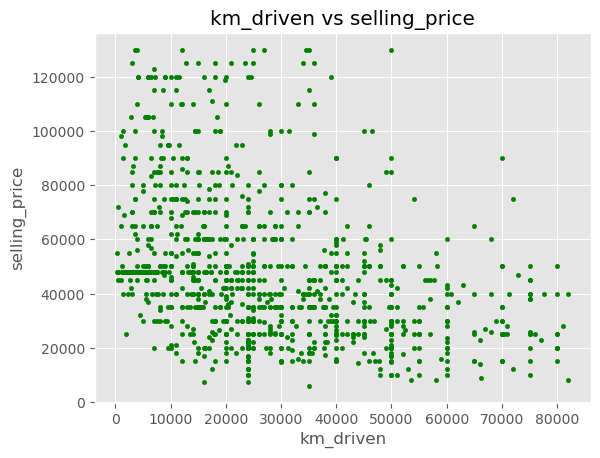

In [56]:
# km_driven vs selling_price in scatter plot
plt.scatter(x = df['km_driven'], y = df['selling_price'],marker='.',color = 'g')

plt.title('km_driven vs selling_price')

plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

Text(0.5, 1.0, "The relationship between the 'km_driven' and 'selling price'")

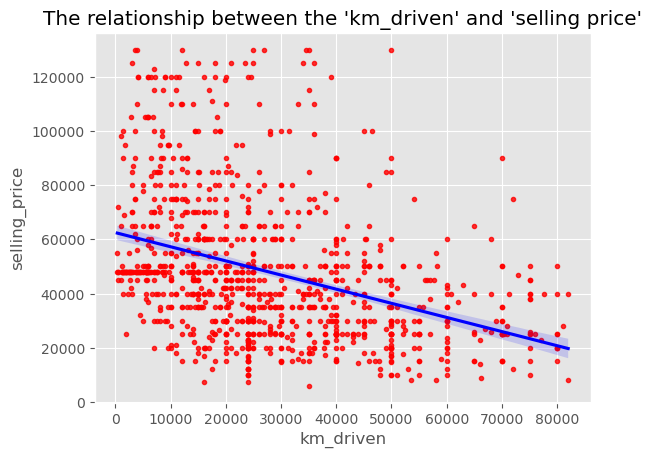

In [54]:
# we can fit this model to get the relationship between km_driven vs selling_price

sns.regplot( x = 'km_driven' , y = 'selling_price', data = df,scatter_kws = {'color':'red'},
            line_kws = {'color':'blue'} ,marker='.')
plt.title("The relationship between the 'km_driven' and 'selling price'")

# the relationship is semi negative between 'km_driven' and 'selling price'

Text(0.5, 1.0, "The relationship between the 'seller_type' and 'selling price'")

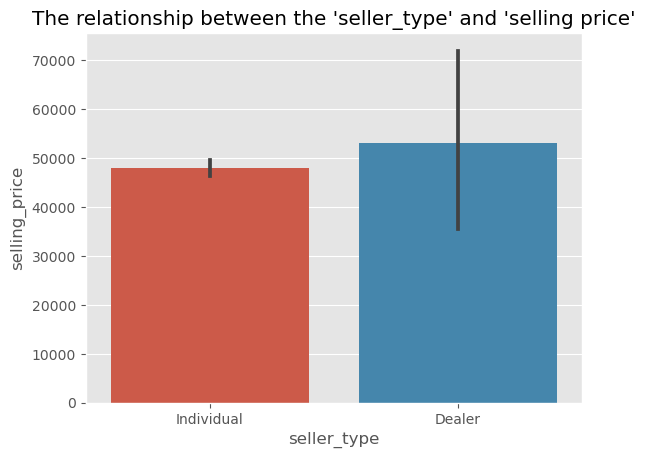

In [62]:
# the relationship between seller_type and selling_price

sns.barplot( x = 'seller_type' , y = 'selling_price', data = df)
plt.title("The relationship between the 'seller_type' and 'selling price'")


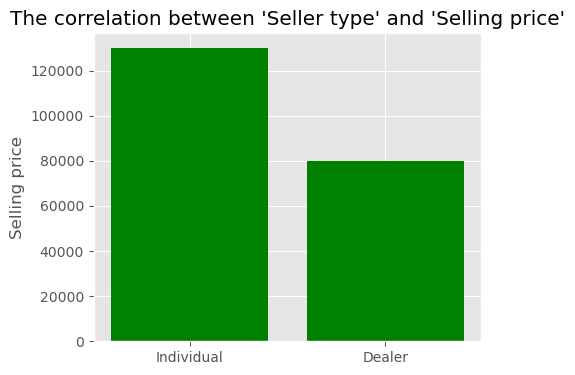

In [67]:
# What is the relationship between seller_type and price?
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(df['seller_type'], df["selling_price"], color="g")

ax.set_ylabel("Selling price")
ax.set_title("The correlation between 'Seller type' and 'Selling price'")

fig.savefig("gold_medals.png")

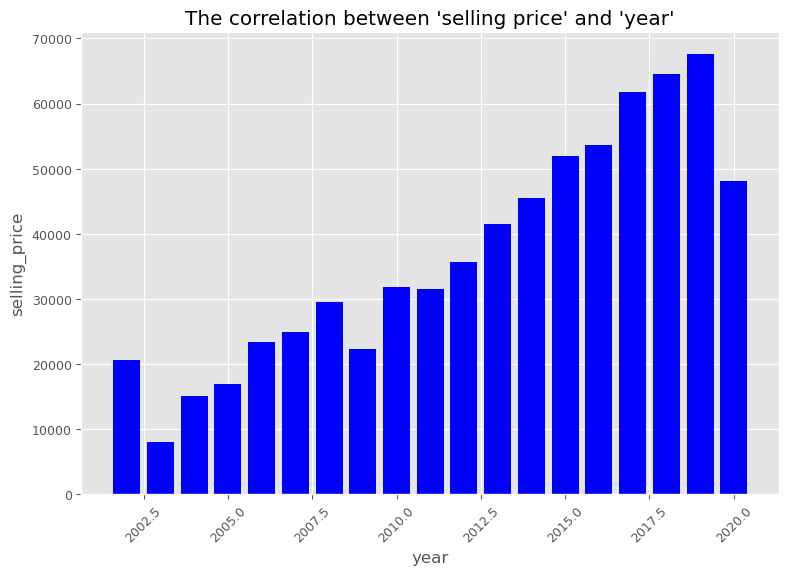

In [77]:
# # What is the year most cars were sold using matplotlib library?
df = df.groupby(["year"]).mean()
df = df.reset_index()

fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(df["year"], df["selling_price"], color="b")

ax.set_xlabel("year")
ax.set_ylabel("selling_price")
ax.set_title("The correlation between 'selling price' and 'year'")

ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

fig.savefig("gold_medals.png")

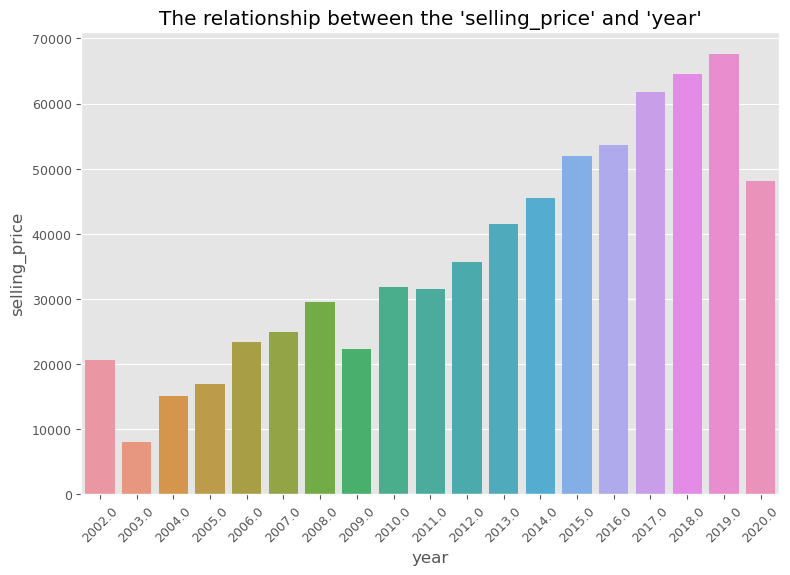

In [93]:
# What is the year most cars were sold using seaborn library?
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot( x = 'year' , y = 'selling_price', data = df)
plt.title("The relationship between the 'selling_price' and 'year'")
ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

# the year of 2019 is the most cars were sold 

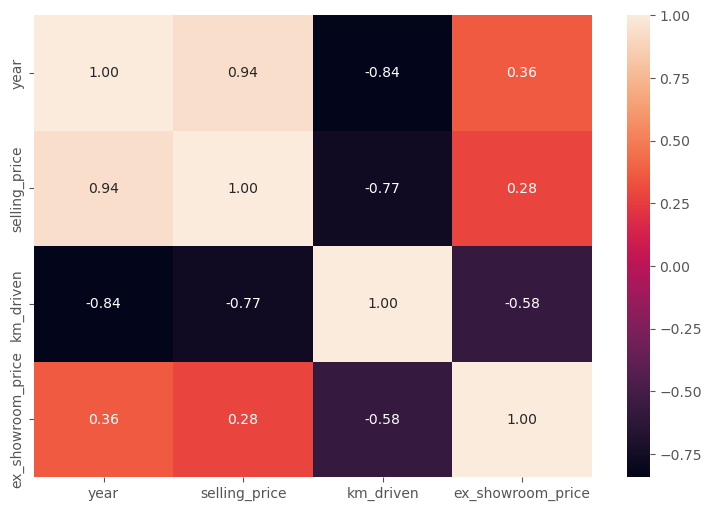

In [100]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(),annot= True, fmt='.2f')
plt.show()

# the correlation between year and selling price is high

# Data patterns

#### 1- Selling price is mostly increased with year so this an upward trend, and it decreased with km_driven so this is a downward trend.
#### 2- The correlation between the selling price and km_driven is weak, the between selling price and year is high and between selling price and ex_showroom price is high.
#### 3- the relationship is semi negative between 'km_driven' and 'selling price'
#### 4- the year of 2019 is the most cars were sold 

# The End